In [1]:
import pandas as pd
import numpy as np

In [2]:
selected_columns = ['Indv. CODE', 'HOUSE_n_or', 'House_n_gl', 'G_H00K', 'sum_G_HOOK', 'num_indiv', 
                    'Electricit', 'Radio', 'Domestic animals', 'Toilet', 
                    'Drinking w', 'Drinking_1', 'Bath', 'Water cook', 
                    'Hand washi', 'NDVI', 'ri_bfd', 'ri_orcd_n', 'BSI_n', 
                    'MSI_n', 'NDBI_n', 'BLDFIE_n', 'BDRIC_n', 'CECSOL_n', 
                    'Clyp_n', 'Crfvol_n', 'Ocstha_n', 'SLTppt_n', 'Phihox_n', 'Phikcl_n']

In [3]:
column_types = {
    'GENDER': 'category', 
    'AGE': 'float64', 
    're_G_trich': 'category', 
    're_G_Asc': 'category', 
    're_G_Hook': 'category', 
    're_H_Enter': 'category',
    're_H_Schis': 'category', 
    're_H_Hym_n': 'category', 
    're_H_Hym_d': 'category', 
    'sum_G_Stro': 'float64', 
    'sum_G_Tric': 'float64',
    'sum_G_Asc': 'float64', 
    'sum_G_HOOK': 'float64', 
    'sum_H_Ente': 'float64', 
    'sum_H_Schi': 'float64', 
    'sum_H_Hym_': 'float64',
    'sum_H_Hy_1': 'float64', 
    'si_G_Stron': 'category', 
    'si_G_Trich': 'category', 
    'si_G_Asc': 'category', 
    'si_G_Hook': 'category',
    'si_H_Enter': 'category', 
    'si_H_schis': 'category', 
    'si_H_hym_n': 'category', 
    'si_H_hym_d': 'category', 
    'riq_Geoh': 'float64',
    'riq_helm': 'float64', 
    'p_G_Strong': 'float64', 
    'p_G_Trich': 'float64', 
    'p_G_Asc': 'float64', 
    'p_G_HOOK': 'float64',
    'p_H_Enter': 'float64', 
    'p_H_Schis': 'float64', 
    'p_H_hym_n': 'float64', 
    'p_H_hym_d': 'float64', 
    'sh_geohel': 'float64',
    'sh_helm': 'float64', 
    'geohel_dom': 'category', 
    'Re_hous_nu': 'float64', 
    'num_indiv': 'float64', 
    're_G_stron': 'category',
       'ind_tip1_G': 'category', 
    'ind_tip1_H': 'category', 
    'p_tip1_G': 'float64', 
    'p_tip1_H': 'float64', 
    'ind_inf_Ge': 'float64',
    'ind_inf_He': 'float64', 
    'n_Geo_mean': 'float64', 
    'n_Hel_mean': 'float64', 
    'HOOKWORM_h': 'float64', 
    'HGH_x_50': 'float64',
    'r_huev_hoo': 'float64', 
    'Roof': 'category', 
    'Floor': 'category', 
    'Wall': 'category', 
    'Electricit': 'category', 
    'Radio': 'category',
    'Domestic a': 'category', 
    'Toilet': 'category', 
    'Drinking w': 'category', 
    'Drinking_1': 'category', 
    'Bath': 'category',
    'Water cook': 'category', 
    'Hand washi': 'category', 
    'Miembros_': 'float64', 
    'n_geo_stde': 'float64', 
    'n_Hel_stde': 'float64',
    're_hgh50': 'float64', 
    'sum_hgh50': 'float64', 
    'Prev_FO': 'float64', 
    'Prev_piel': 'float64', 
    'riego_ingr': 'float64',
    'riesgo_ele': 'category', 
    'Riesgo_wat': 'category', 
    'rieg_w2': 'category', 
    'riesg_w_2': 'category', 
    'riesg_w_3': 'category',
    'Ri_ingre': 'float64', 
    'NDVI': 'float64', 
    'Prec': 'float64', 
    'ri_bfd': 'float64', 
    'ri_orcd_n': 'float64', 
    'Ri_prec': 'float64',
    'Ri_NumInd': 'float64', 
    'BSI_n': 'float64', 
    'MSI_n': 'float64', 
    'NDBI_n': 'float64', 
    'BLDFIE_n': 'float64', 
    'BDRIC_n': 'float64',
    'CECSOL_n': 'float64', 
    'Clyp_n': 'float64', 
    'Crfvol_n': 'float64', 
    'Ocstha_n': 'float64', 
    'SLTppt_n': 'float64', 
    'Phihox_n': 'float64',
    'Phikcl_n': 'float64', 
    'Temp_n': 'float64'
}

In [6]:
base_path = '../data/geohelmints_base.csv'

In [7]:
raw_df = pd.read_csv(base_path, dtype=column_types, header=0, na_values=[' ', '*', ''])

#### Sacamos las ultimas dos filas porque no van 

In [8]:
filtered_base = raw_df.loc[:len(raw_df)-3,selected_columns]

### Creamos Nuevas Features 

#### Creamos las aldeas 

In [9]:
filtered_base['Indv. CODE']

0       SE01
1       SE02
2       SE03
3       SE04
4       SE05
       ...  
365    ZE116
366    ZE117
367    ZE118
368    ZE121
369    ZE123
Name: Indv. CODE, Length: 370, dtype: object

In [10]:
# La aldea es representada por las primeras lestras del codigo del individuo
filtered_base['aldea']=filtered_base['Indv. CODE'].apply(lambda x: x[:2])

#### Creamos la media de las distancias de cada aldea 

In [11]:
mean_distances = {
    'SE': 911,
    'ZE': 372,
    'MA': 369
}

In [12]:
def get_distances(row):
    aldea = row['aldea']
    return mean_distances[aldea]

In [13]:
filtered_base['mean_distance'] = filtered_base.apply(lambda x: get_distances(x), axis=1)

### Media de prevalencia por casa 

In [14]:
target_feature = 'sum_G_HOOK'

## Agrupamos por casa 

In [15]:
base_byhouse = filtered_base.groupby('HOUSE_n_or').first()

#### Vemos el target por casa 

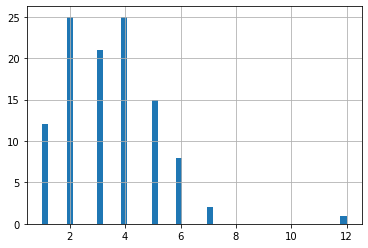

In [17]:
base_byhouse['num_indiv'].hist(bins=50)

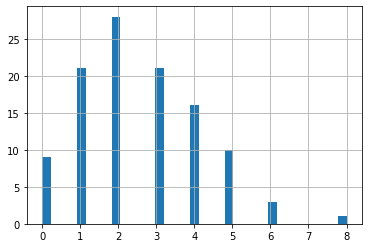

In [18]:
base_byhouse[target_feature].hist(bins=35)

### Dividimos entre target y features 

In [19]:
features = base_byhouse.drop(columns=[target_feature])

In [20]:
target = base_byhouse[target_feature]

### Fix nan values 

In [21]:
features['Drinking w'] = features['Drinking w'].fillna('Well')
features.Drinking_1 = features.Drinking_1.fillna('River')
features.Bath = features.Bath.fillna('River')
features['Water cook'] = features['Water cook'].fillna('River')
features['Hand washi'] = features['Hand washi'].fillna('River')
features.Radio = features.Radio.fillna('0')

## Encode Categorical data 

Las que se puede, vamos a encodearla con el orden natural de las caracteristicas que simbolizan

Las presencia/ausencia tambien modelan caracteristicas sociales que indican usar valores 0,1

In [22]:
toilet_encode = {'Open area/Bush': 0, 'Latrine without slate': 1}
water_encode = {'Well': 0, 'River': 1, 'Pipe line': 2, 'Treated boreholes': 3}

In [23]:
def encode_categorical_features(row):
    elec = int(row['Electricit'])
    row['Electricit'] = elec
    radio = int(row['Radio'])
    row['Radio'] = radio
    
    toilet = toilet_encode[row['Toilet']]
    row['Toilet'] = toilet
    
    drink_w = water_encode[row['Drinking w']]
    row['Drinking w'] = drink_w
    
    drink_1 = water_encode[row['Drinking_1']]
    row['Drinking_1'] = drink_1
    
    bath = water_encode[row['Bath']]
    row['Bath'] = bath
    
    water_c = water_encode[row['Water cook']]
    row['Water cook'] = water_c
    
    hand_wash = water_encode[row['Hand washi']]
    row['Hand washi'] = hand_wash
    
    
    return row


In [24]:
encoded_features = features.apply(lambda x: encode_categorical_features(x), axis=1)

In [33]:
non_columns = ['aldea','Indv. CODE','House_n_gl','G_H00K','num_indiv']
# features_casas es lo mismo que base_saldeas del otro notebook
features_casas = encoded_features.drop(columns=non_columns)

In [32]:
features_casas

,Electricit,Radio,Domestic animals,Toilet,Drinking w,Drinking_1,Bath,Water cook,Hand washi,NDVI,...,BLDFIE_n,BDRIC_n,CECSOL_n,Clyp_n,Crfvol_n,Ocstha_n,SLTppt_n,Phihox_n,Phikcl_n,mean_distance
HOUSE_n_or,,,,,,,,,,,,,,,,,,,,,
MA-01,0,0,1.0,0,0,0,1,0,0,0.604,...,0.256,1.0,0.336,0.333,0.435,0.200,0.4,0.000,0.679,369
MA-02,0,0,1.0,0,0,0,0,0,0,0.598,...,0.178,1.0,0.336,0.333,0.478,0.100,0.4,0.250,0.428,369
MA-03,0,0,1.0,0,0,0,0,0,0,0.604,...,0.229,1.0,0.336,0.333,0.450,0.165,0.4,0.087,0.591,369
MA-04,0,0,0.0,0,0,0,0,0,0,0.598,...,0.193,1.0,0.336,0.333,0.470,0.119,0.4,0.202,0.476,369
MA-05,0,0,0.0,0,0,0,0,0,0,0.592,...,0.197,1.0,0.336,0.333,0.468,0.124,0.4,0.189,0.489,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZE-40,1,0,0.0,0,1,0,0,0,0,0.492,...,0.223,1.0,0.783,0.444,0.217,0.300,0.6,0.500,0.428,372
ZE-41,1,0,0.0,1,0,0,0,0,0,0.492,...,0.223,1.0,0.783,0.444,0.217,0.300,0.6,0.500,0.428,372
ZE-43,1,1,0.0,0,0,0,0,0,0,0.520,...,0.290,1.0,0.559,0.444,0.174,0.300,0.4,0.750,0.929,372


In [26]:
features_casas.columns

Index(['Electricit', 'Radio', 'Domestic animals', 'Toilet', 'Drinking w',
       'Drinking_1', 'Bath', 'Water cook', 'Hand washi', 'NDVI', 'ri_bfd',
       'ri_orcd_n', 'BSI_n', 'MSI_n', 'NDBI_n', 'BLDFIE_n', 'BDRIC_n',
       'CECSOL_n', 'Clyp_n', 'Crfvol_n', 'Ocstha_n', 'SLTppt_n', 'Phihox_n',
       'Phikcl_n', 'mean_distance'],
      dtype='object')

In [34]:
target

HOUSE_n_or
MA-01    4.0
MA-02    4.0
MA-03    8.0
MA-04    3.0
MA-05    3.0
        ... 
ZE-40    1.0
ZE-41    2.0
ZE-43    3.0
ZE-44    2.0
ZE-46    1.0
Name: sum_G_HOOK, Length: 109, dtype: float64

# Una vez que limpiamos los datos, entrenamos el modelo¶


### Dividimos la data en train-test

#### Haremos una dividisión 80-20

In [43]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(features_casas, target, test_size=0.20, random_state=42)

In [44]:
len(X_train), len(X_test)

(87, 22)

## Primero, tuneamos parametros via Crossvalidation

In [379]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

def stats(xs, ts, model, n_splits=5):
    scores = cross_val_score(model, xs, ts, cv=n_splits, scoring='neg_mean_squared_error')

    scores = np.sqrt(-scores)

    mean = scores.mean()
    std_dev = scores.std()

    return scores, mean, std_dev


def print_stats(scores, mean, std_dev, title='Stats'):
    print()
    print(title)
    print('-' * len(title))
    print('')
    print('Model Scores: ', scores)
    print('Mean Score: ', mean)
    print('Standard Deviation of Score: ', std_dev)

## Primero, un RandomForest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [362]:
RandomForestRegressor()


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [340]:
rndm_params = {'max_depth': 3, 'n_estimators':5, 
             'oob_score': 'squarederror', 'random_state':4,
          }


In [360]:
rnd_scores, rnd_mean, rnd_std_dev = stats(X_train, y_train, RandomForestRegressor())

In [361]:
print_stats(rnd_scores, rnd_mean, rnd_std_dev)


Stats
-----

Model Scores:  [1.68421986 1.655206   1.92738254]
Mean Score:  1.7556028002581139
Standard Deviation of Score:  0.12204277901529843


## Ahora, para el XGBoost 

In [343]:
from xgboost.sklearn import XGBModel

In [540]:
xgb_params = {'max_depth': 3, 'n_estimators':5,
          'tree_method': 'exact', 'booster': 'gbtree', 
         'objective': 'reg:squarederror', 'colsample_bynode': 0.2, 'base_score':y_train.mean()}


In [541]:
xgb_scores, xgb_mean, xgb_std_dev = stats(X_train, y_train, XGBModel(**xgb_params))

In [542]:
print_stats(xgb_scores, xgb_mean, xgb_std_dev)


Stats
-----

Model Scores:  [1.70929096 1.83679609 1.67696463 1.25038151 1.99699828]
Mean Score:  1.6940862925978795
Standard Deviation of Score:  0.24880515665529612


### Notamos que el XGBOOST da mejor performance 

## Ahora vemos las relaciones de los modelos entrenados con respecto a la prediccion 

In [536]:
model_xgb = XGBModel(**xgb_params)

In [537]:
model_xgb.fit(X_train, y_train)

XGBModel(base_score=2.632183908045977, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=0.2, colsample_bytree=1, gamma=0, gpu_id=-1,
         importance_type='gain', interaction_constraints=None,
         learning_rate=0.300000012, max_delta_step=0, max_depth=3,
         min_child_weight=1, missing=nan, monotone_constraints=None,
         n_estimators=3, n_jobs=0, num_parallel_tree=1,
         objective='reg:squarederror', random_state=0, reg_alpha=0,
         reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
         validate_parameters=False, verbosity=None)

In [518]:
# Este es el modelo que tira numeros aleatorios entre 0 y 6
train_random_model = [random.randint(0,6) for _ in range(len(y_train))]
test_random_model = [random.randint(0,6) for _ in range(len(y_test))]

print('MSE para el conjunto de entrenamiento: ', mean_squared_error(y_train, train_random_model))
print('MSE para el conjunto de test: ', mean_squared_error(y_test, test_random_model))

MSE para el conjunto de entrenamiento:  6.793103448275862
MSE para el conjunto de test:  4.590909090909091


In [521]:
# Este es el modelo que tira numeros aleatorios entre 2 y 3 (bien cerca de la media y su desviacion)
train_random_model = [random.randint(2,3) for _ in range(len(y_train))]
test_random_model = [random.randint(2,3) for _ in range(len(y_test))]

print('MSE para el conjunto de entrenamiento: ', mean_squared_error(y_train, train_random_model))
print('MSE para el conjunto de test: ', mean_squared_error(y_test, test_random_model))

MSE para el conjunto de entrenamiento:  3.2873563218390807
MSE para el conjunto de test:  1.9545454545454546


In [538]:
# Este es el modelo que tira Siempre el valor la media
train_constant_model = [y_train.mean() for _ in range(len(y_train))]
test_constant_model = [y_train.mean() for _ in range(len(y_test))]

print('MSE para el conjunto de entrenamiento: ', mean_squared_error(y_train, train_constant_model))
print('MSE para el conjunto de test: ', mean_squared_error(y_test, test_constant_model))

MSE para el conjunto de entrenamiento:  2.7612630466376005
MSE para el conjunto de test:  1.8609940066539357


In [548]:
# Este es el modelo que entrenamos
from sklearn.metrics import mean_squared_error
train_y_pred = model_xgb.predict(X_train)
test_y_pred = model_xgb.predict(X_test)

print('MSE para el conjunto de entrenamiento: ', mean_squared_error(y_train, train_y_pred))
print('MSE para el conjunto de test: ', mean_squared_error(y_test, test_y_pred))
print("""\n
Notar que para el conjunto de test da un poco peor que el modelo que devuelve la media de los datos siempre. 
Esto tiene que ver con la disperción de los datos y que este modelo devuelve numeros reales en vez de naturales.
Si ven el grafico de predicted vs observado de test, se nota que hay muchos puntos que está a una distancia menor
a 1, por lo que si los discretizaramos, ya no sería error. O dicho de otra forma, al no discrtizarlo se lo penaliza
con errores (pequeños, pero errores al fin).
""")

MSE para el conjunto de entrenamiento:  1.891578345236205
MSE para el conjunto de test:  1.9284164938066697


Notar que para el conjunto de test da un poco peor que el modelo que devuelve la media de los datos siempre. 
Esto tiene que ver con la disperción de los datos y que este modelo devuelve numeros reales en vez de naturales.
Si ven el grafico de predicted vs observado de test, se nota que hay muchos puntos que está a una distancia menor
a 1, por lo que si los discretizaramos, ya no sería error. O dicho de otra forma, al no discrtizarlo se lo penaliza
con errores (pequeños, pero errores al fin).



# Miramos los hitogramas de los targets

Histograma del los targets observados


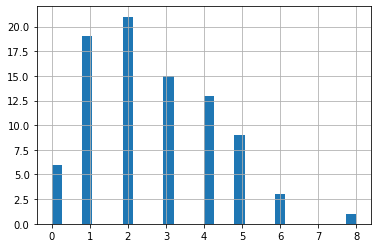

In [499]:
print("Histograma del los targets observados")
y_train.hist(bins=30)

Histograma del los targets predichos


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa19a067550>]],
      dtype=object)

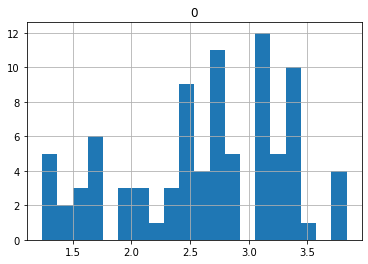

In [500]:
print("Histograma del los targets predichos")

pd.DataFrame(y_pred).hist(bins=20)

## Ploteamos los puntos observados y predichos 

Plot de observado vs predicho sobre el CONJUNTO DE ENTRENAMIENTO


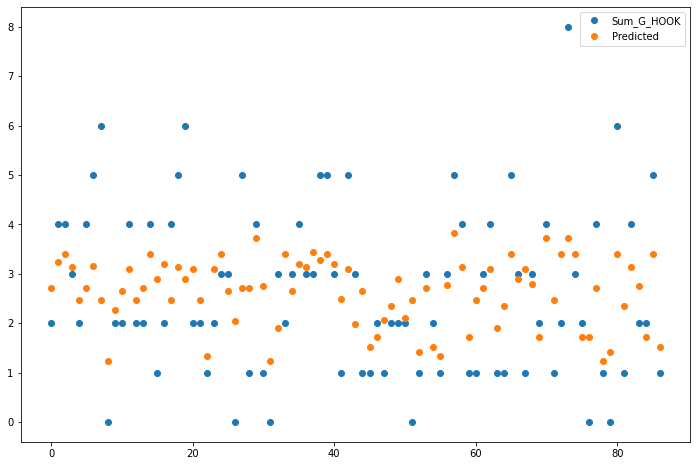

In [501]:
import matplotlib.pyplot as plt
from random import randint

print("Plot de observado vs predicho sobre el CONJUNTO DE ENTRENAMIENTO")

data = list(zip(y_train.tolist(), y_pred))
pd.DataFrame(data, columns=['Sum_G_HOOK', 'Predicted']).plot(style='o', figsize=(12,8))


Plot de observado vs predicho sobre el CONJUNTO DE TEST


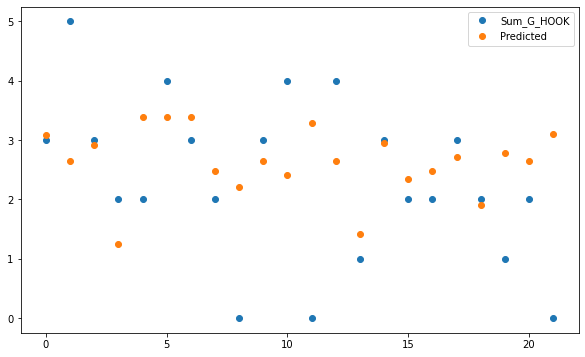

In [543]:
print("Plot de observado vs predicho sobre el CONJUNTO DE TEST")

data_t = list(zip(y_test.tolist(), y_pred_t))
pd.DataFrame(data_t, columns=['Sum_G_HOOK', 'Predicted']).plot(style='o', figsize=(10,6))


## Graficos de los errores 

In [544]:
errores_train = y_train - y_pred
errores_test = y_test - y_pred_t

Histograma de los errores sobre las predicciones del conjunto de ENTRENAMIENTO


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa199b7d860>]],
      dtype=object)

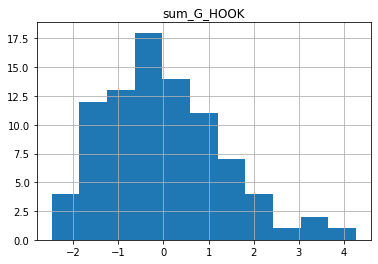

In [506]:
print("Histograma de los errores sobre las predicciones del conjunto de ENTRENAMIENTO")
pd.DataFrame(errores_train).hist(bins=11)

Histograma de los errores sobre las predicciones del conjunto de TEST


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1998abd30>]],
      dtype=object)

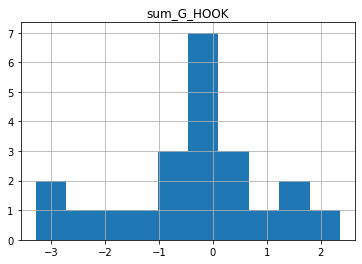

In [547]:
print("Histograma de los errores sobre las predicciones del conjunto de TEST")

pd.DataFrame(errores_test).hist(bins=10)